In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_json(path_or_buf='./deviation.json')
df.head()

,name,gt_corners,rb_corners,mean,max,min,floor_mean,floor_max,floor_min,ceiling_mean,ceiling_max,ceiling_min
0,Schlafzimmer,4,4,3.956313,8.562939,0.274574,3.987864,8.562939,0.274574,3.924762,8.501885,0.331494
1,Küche,4,4,23.019122,52.605437,0.724299,1.253103,1.897612,0.724299,44.785141,52.605437,36.880814
2,Bathroom,4,4,1.013833,1.950322,0.301673,0.659138,1.318714,0.301673,1.368528,1.950322,0.878106
3,Lounge/Diner,8,8,3.832620,18.236935,0.173307,3.600083,15.041431,0.173307,4.065157,18.236935,0.253457
4,Essbereich,4,4,8.017758,15.642853,0.762948,7.819446,15.399635,0.762948,8.216069,15.642853,0.909029


In [12]:
# Unique Room Types
names= df.name.unique()
num_unique_names = len(names)

print(f"Number of unique room types: {num_unique_names}")

Number of unique room types: 588


In [16]:
# Get the counts of each unique room type
name_counts = df['name'].value_counts()

name_counts_df = name_counts.reset_index()

# Rename the columns for better readability
name_counts_df.columns = ['Unique Room Types', 'Count']
name_counts_df

,Unique Room Types,Count
0,Master Bedroom,42
1,Dining room,36
2,Bathroom,36
3,Hallway,31
4,Bedroom 2,31
...,...,...
583,Service Hallway 2,1
584,Pamtry,1
585,Kitchen 5,1
586,BR Vanity,1


## Basic Statistics

In [4]:
df.describe()

,gt_corners,rb_corners,mean,max,min,floor_mean,floor_max,floor_min,ceiling_mean,ceiling_max,ceiling_min
count,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000
mean,4.307350,4.307350,12.895320,25.448011,2.920388,11.022443,20.405499,3.146246,14.768198,24.848020,5.521437
std,0.814412,0.814412,21.839948,42.758159,9.258972,19.136320,33.189081,9.559611,26.047057,42.345579,14.460565
min,4.000000,4.000000,0.192973,0.323886,0.007456,0.134686,0.178059,0.007456,0.123169,0.220846,0.009268
25%,4.000000,4.000000,0.658488,1.243804,0.147432,0.514150,0.888043,0.164668,0.742915,1.180960,0.306071
50%,4.000000,4.000000,2.123456,4.703514,0.279876,1.932503,4.008014,0.304374,2.159995,3.777277,0.600597
75%,4.000000,4.000000,14.810982,28.312051,0.674444,13.430288,24.986504,0.801416,15.150233,27.551533,1.840563
max,10.000000,10.000000,121.301055,179.165483,81.764483,121.244083,177.961811,81.791505,157.387474,179.165483,144.472533



gt_corners & rb_corners: The ground truth and BIM model prediction for the number of corners both have similar statistics.

- Mean (average): 4.31 corners, which implies that most rooms have about 4 corners based on both ground truth and predictions.
- Min: 4 corners, Max: 10 corners, implying the rooms are mostly rectangular, but some have up to 10 corners.
- Standard Deviation (std): 0.81, which is relatively low, suggesting that the data points are closely packed around the mean.
- mean, max, min, floor_mean, floor_max, floor_min, ceiling_mean, ceiling_max, ceiling_min: These are various metrics of the deviation between the ground truth and the model.

1. The mean deviations (mean, floor_mean, ceiling_mean) vary, suggesting that the model's accuracy might differ depending on whether it's predicting floor or ceiling corners.
2. The Standard Deviations are relatively high for many of these columns, which indicates a large variability in the deviations.
3. The maximum deviations (max, floor_max, ceiling_max) are quite high, suggesting that in some cases, the model might be significantly off from the ground truth.
#### Percentiles
- 25% of the data has a mean deviation less than or equal to 0.66.
- 50% of the data has a mean deviation less than or equal to 2.12.
- 75% of the data has a mean deviation less than or equal to 14.81.

In [5]:
dfcorr= df[df.columns[3:]].corr(numeric_only=True)
dfcorr

,mean,max,min,floor_mean,floor_max,floor_min,ceiling_mean,ceiling_max,ceiling_min
mean,1.000000,0.945928,0.672207,0.954501,0.942309,0.678960,0.975705,0.940502,0.786345
max,0.945928,1.000000,0.489443,0.852427,0.911243,0.498912,0.960021,0.996956,0.648461
min,0.672207,0.489443,1.000000,0.745491,0.578652,0.973961,0.579565,0.481758,0.687748
floor_mean,0.954501,0.852427,0.745491,1.000000,0.951630,0.760528,0.865979,0.840623,0.708154
floor_max,0.942309,0.911243,0.578652,0.951630,1.000000,0.586213,0.881070,0.901493,0.638558
floor_min,0.678960,0.498912,0.973961,0.760528,0.586213,1.000000,0.579843,0.486769,0.665330
ceiling_mean,0.975705,0.960021,0.579565,0.865979,0.881070,0.579843,1.000000,0.959593,0.798401
ceiling_max,0.940502,0.996956,0.481758,0.840623,0.901493,0.486769,0.959593,1.000000,0.641113
ceiling_min,0.786345,0.648461,0.687748,0.708154,0.638558,0.665330,0.798401,0.641113,1.000000


#### Summary
Mean deviations (mean, floor_mean, ceiling_mean) are generally highly correlated with maximum deviations (max, floor_max, ceiling_max).

Minimum deviations (min, floor_min, ceiling_min) are not as strongly correlated with maximum and mean deviations, potentially pointing to room irregularities or measurement inconsistencies.

Ceiling and floor metrics are highly correlated with the overall room metrics (mean, max).

## Data Viz

<Axes: >

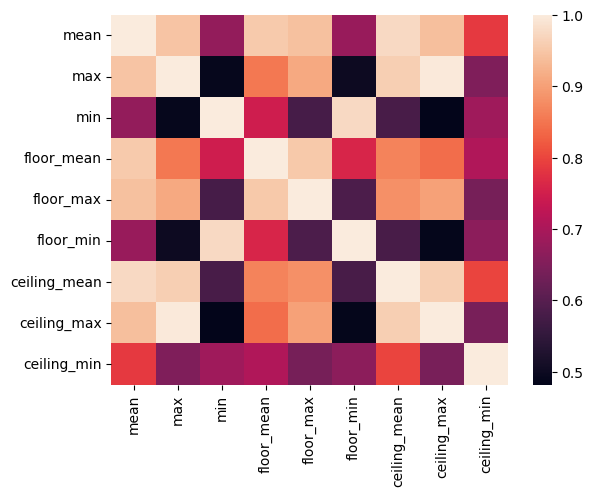

In [6]:
from seaborn import heatmap
heatmap(data= dfcorr)

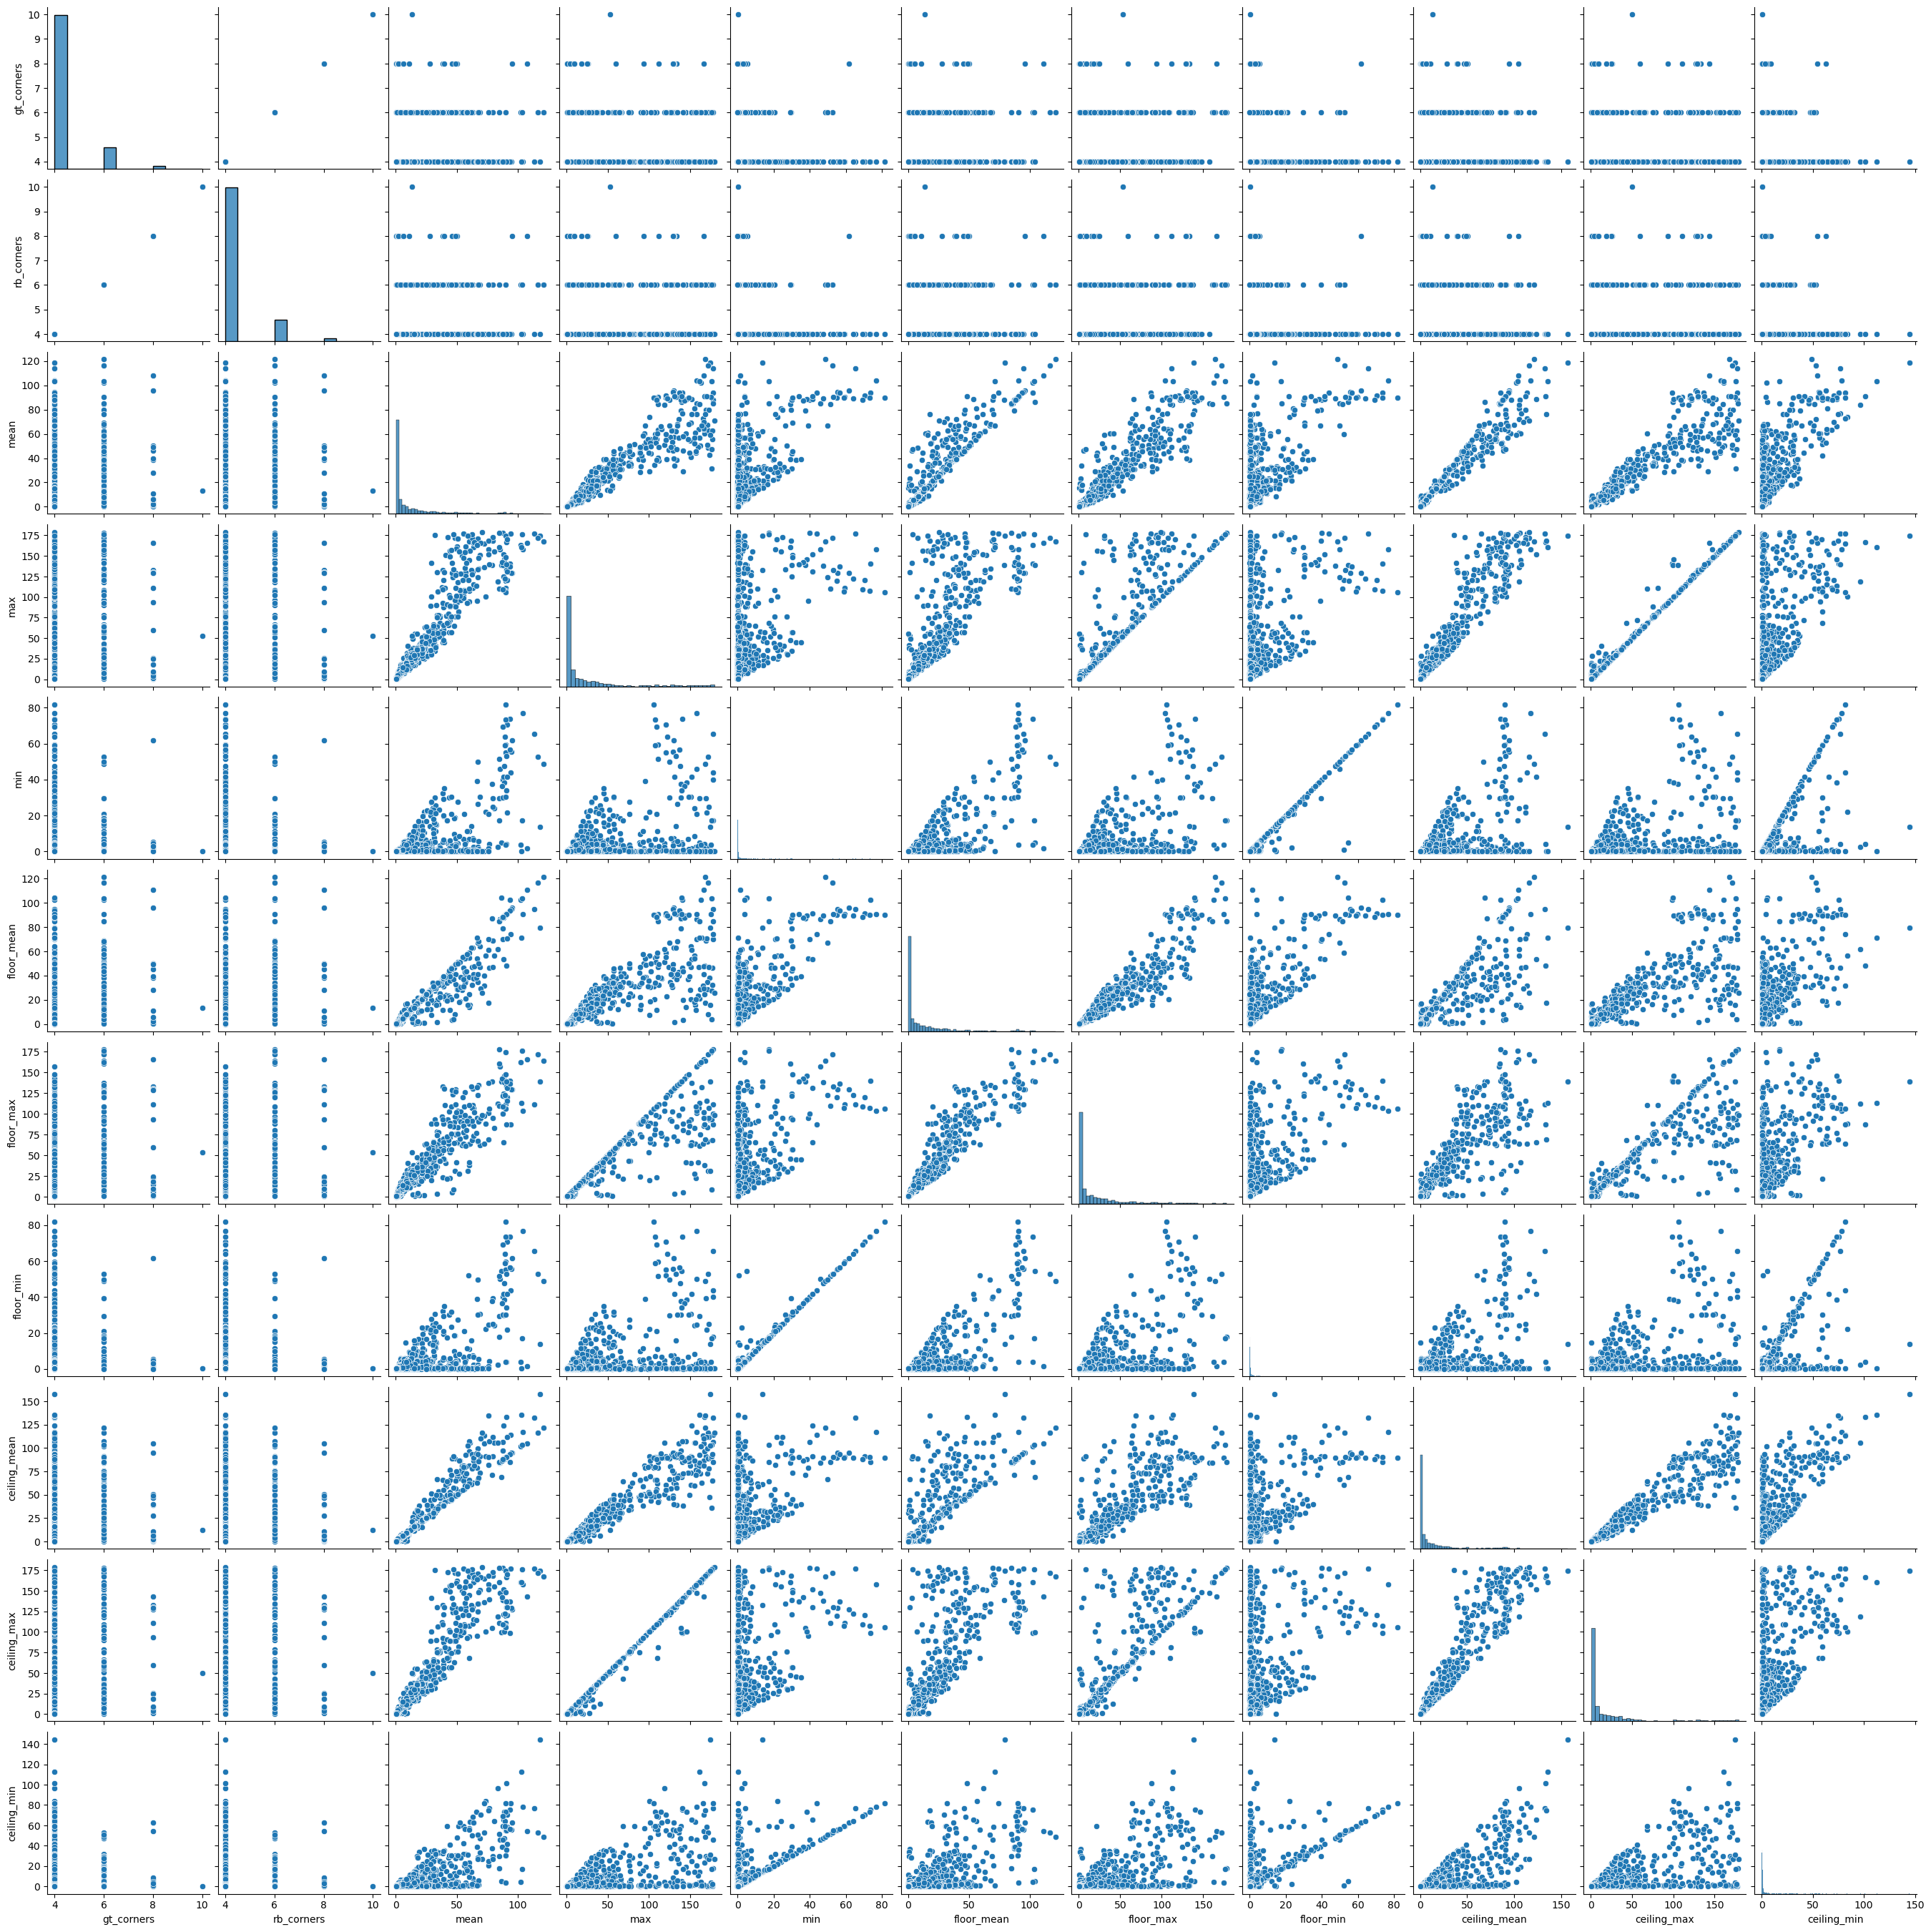

In [7]:
sns.pairplot(df)

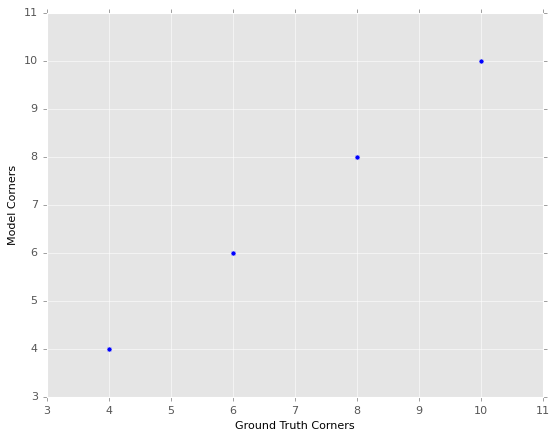

In [21]:
plt.style.use('ggplot')
plt.scatter(df['gt_corners'], df['rb_corners'])
plt.xlabel('Ground Truth Corners')
plt.ylabel('Model Corners')
plt.show()


The correlation between gt_corners (Ground Truth Corners) and rb_corners (Corners found by the model) is 1. This suggests a perfect positive linear relationship between the two variables. In simpler terms, this means that as the number of ground truth corners increases, the number of corners found by the model also increases in an exactly linear manner, and vice versa.